In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import KNNImputer

import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset
data = pd.read_csv('UsArrests.csv')
data.head()

# Select the feature to impute (Assault in this case)
feature = "Assault"

In [58]:
# Number of cases
num_cases = data.shape[0]

# Number of features
num_features = data.shape[1] - 1  # Exclude the 'City' column

print("Number of cases:", num_cases)
print("Number of features:", num_features)

Number of cases: 50
Number of features: 4


In [59]:
# Set decimal precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Describe function to obtain statistical properties
stats = data.describe()

# Select relevant rows
selected_stats = stats.loc[["mean", "std", "min", "max"]].transpose()
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


In [60]:
# Count missing values
missing = data.isnull().sum()

# Create a DataFrame of relevant missing values
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [61]:
# Examine types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


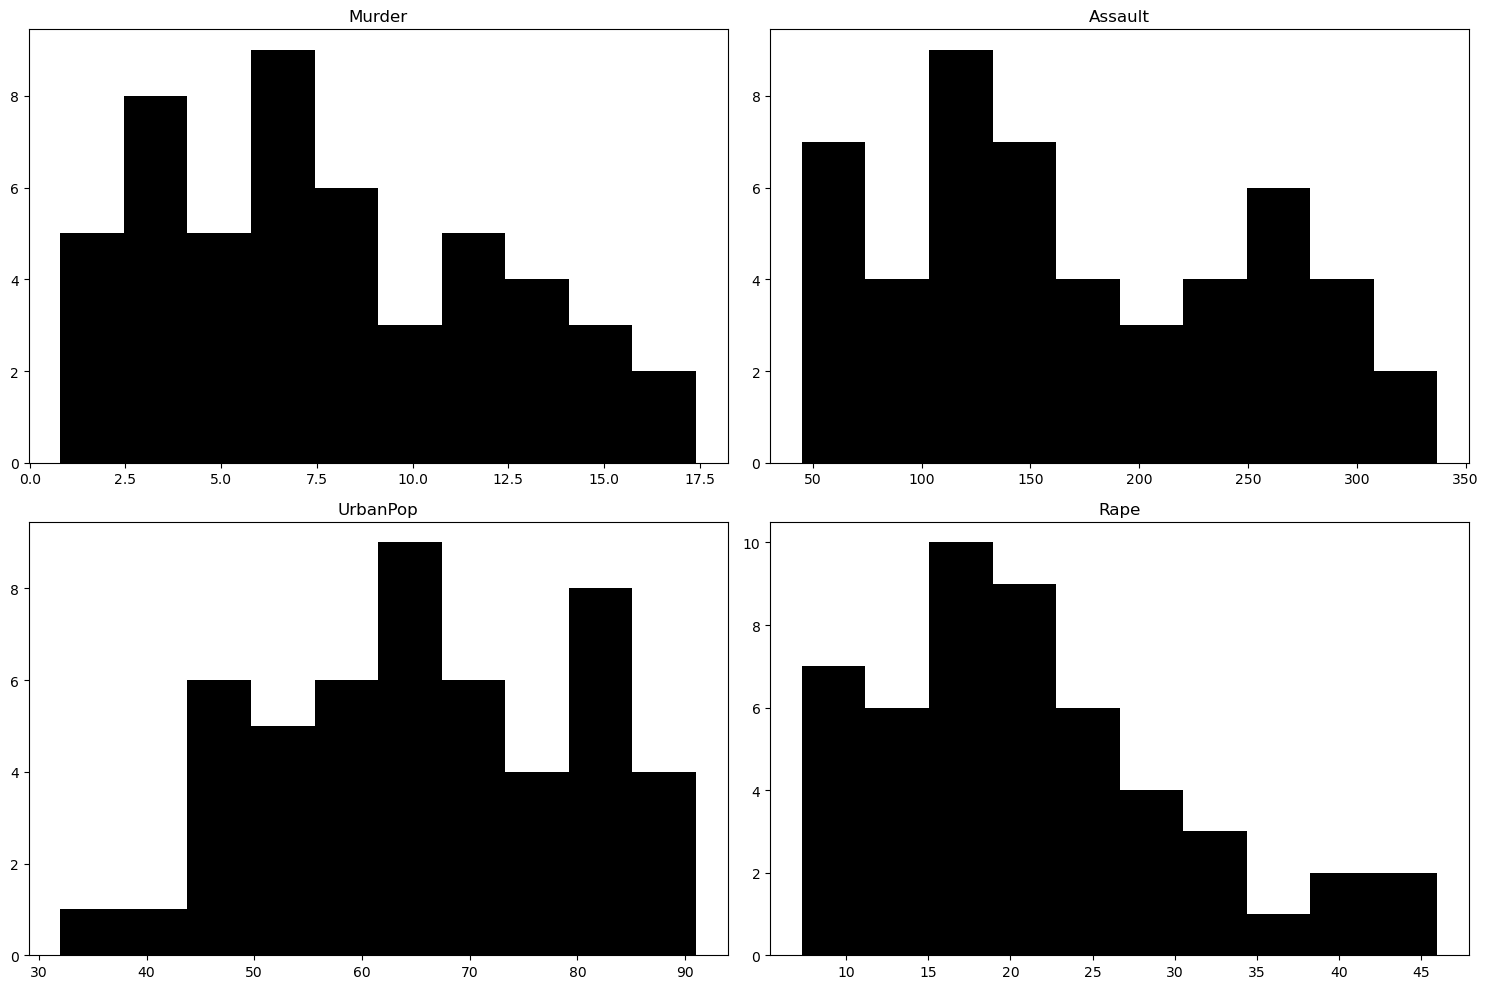

In [62]:
# Plot histograms
histograms = data.hist(color='black', grid=False, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [63]:
# Count missing values
missing = data.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])

# Set the decimal precision
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Summarize statistical properties
stats = data.describe()
selected_stats = stats.loc[["mean", "std", "min", "max"]].transpose()

# Create summary table
frames = [relevant_missing, selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns={"0": "missing"}, inplace=True)

# Save summary as CSV
summary.to_csv('summary.csv', index=True)

# Display the summary table
summary

,missing,mean,std,min,max
City,0,NaN,NaN,NaN,NaN
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
UrbanPop,0,65.54,14.47,32.00,91.00
Rape,0,21.23,9.37,7.30,46.00


In [64]:
# Extract the feature with missing values
X = data[feature].values.reshape(-1, 1)  # reshape because we are looking at a single feature

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5, weights="uniform", metric="nan_euclidean")
imputed_values = imputer.fit_transform(X)

# Replace the imputed values in the dataset
data[feature] = imputed_values

# Print the comparison between original and imputed values
comparison = pd.DataFrame(columns=["Original", "Imputed"])
comparison["Original"] = X.squeeze()
comparison["Imputed"] = imputed_values.squeeze()
print(comparison)

    Original  Imputed
0        236   236.00
1        263   263.00
2        294   294.00
3        190   190.00
4        276   276.00
5        204   204.00
6        110   110.00
7        238   238.00
8        335   335.00
9        211   211.00
10        46    46.00
11       120   120.00
12       249   249.00
13       113   113.00
14        56    56.00
15       115   115.00
16       109   109.00
17       249   249.00
18        83    83.00
19       300   300.00
20       149   149.00
21       255   255.00
22        72    72.00
23       259   259.00
24       178   178.00
25       109   109.00
26       102   102.00
27       252   252.00
28        57    57.00
29       159   159.00
30       285   285.00
31       254   254.00
32       337   337.00
33        45    45.00
34       120   120.00
35       151   151.00
36       159   159.00
37       106   106.00
38       174   174.00
39       279   279.00
40        86    86.00
41       188   188.00
42       201   201.00
43       120   120.00
44        

In [65]:
# Replace the imputed values in the dataframe
data[feature] = imputed_values

# Count missing values to check if there are any remaining
missing = data.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])

# Display the relevant missing values
relevant_missing

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


C:\Users\smsmk\AppData\Local\Temp\ipykernel_17836\4140517180.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = data.corr()
C:\Users\smsmk\AppData\Local\Temp\ipykernel_17836\4140517180.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut = np.triu(np.ones(corr_df.shape)).astype(np.bool)


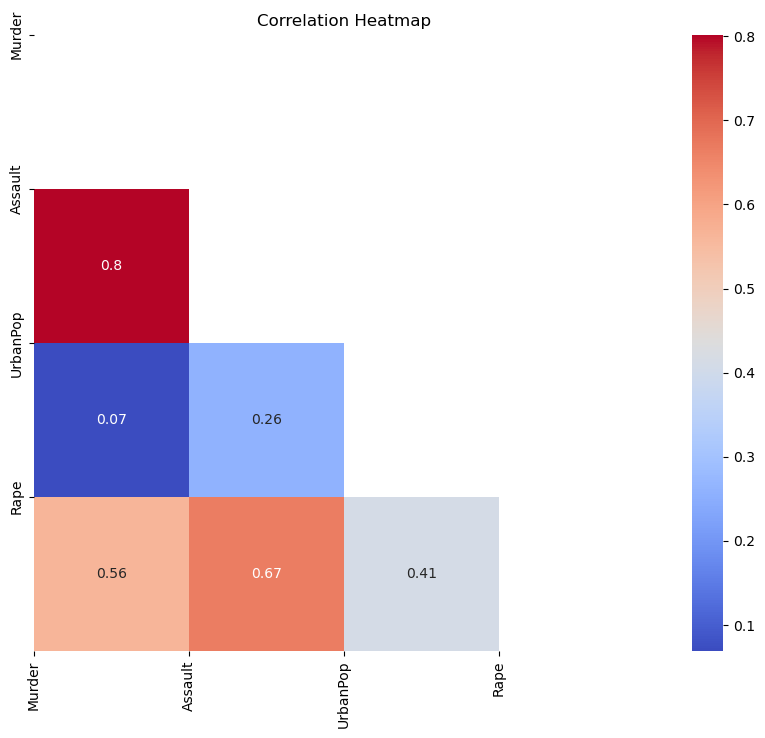

In [66]:
#Compute correlations
corr_df = data.corr()

# Create a mask for the upper triangle
mask_ut = np.triu(np.ones(corr_df.shape)).astype(np.bool)
labels = corr_df.columns

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=90)
plt.yticks(range(len(corr_df.columns)), corr_df.columns)
plt.show()

C:\Users\smsmk\AppData\Local\Temp\ipykernel_17836\2703723672.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)


<Axes: >

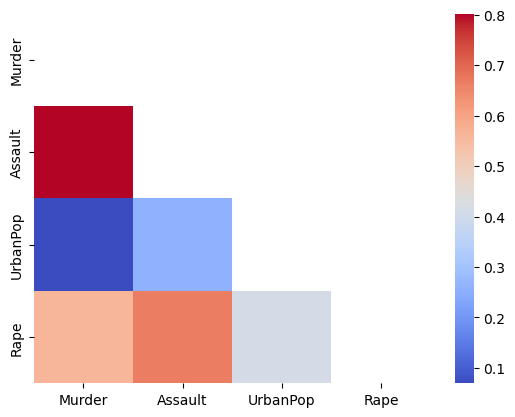

In [67]:
import seaborn as sns
mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")

In [68]:
# Extract the City column
cities = data["City"]

# Drop the City column from the dataset
data = data.drop("City", axis=1)

# Convert the data to a numpy array
X = data.values

# Apply PCA
pca = PCA()
X_trans = pca.fit_transform(X)

# Create a DataFrame to store the transformed data
df_pca = pd.DataFrame(X_trans)

# Add the City column back to the transformed data
df_pca["City"] = cities

# Display the first few rows of the transformed data
df_pca.head()

,0,1,2,3,City
0,64.80,11.45,-2.49,2.41,Alabama
1,92.83,17.98,20.13,-4.09,Alaska
2,124.07,-8.83,-1.69,-4.35,Arizona
3,18.34,16.70,0.21,-0.52,Arkansas
4,107.42,-22.52,6.75,-2.81,California


In [69]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73240025 14.21240185  6.48942607  2.48279   ]


In [70]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.65534221e-01 2.78173366e-02 5.79953492e-03 8.48907879e-04]


In [71]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11485102 7213.10721735 7255.2198681  7261.38411429]


In [90]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

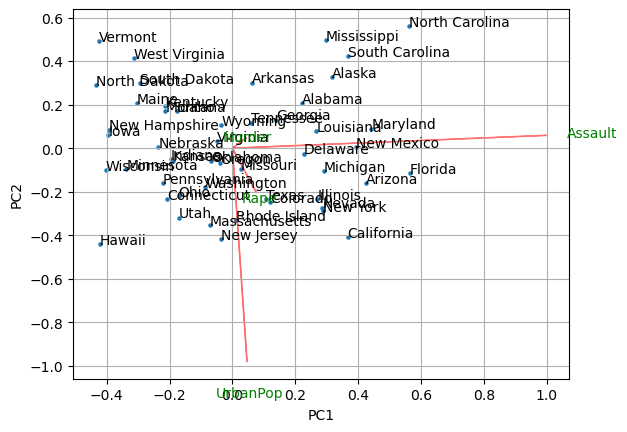

In [91]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

In [92]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) # change precision to see more decimal places

pc1 = np.abs(pca.components_[0])  # components x features - access at index 0 to get the first component
pc2 = np.abs(pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = list(data.columns)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2

feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


In [93]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Perform PCA on the standardized data
std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

# Create DataFrame of the standardized PCA results
df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


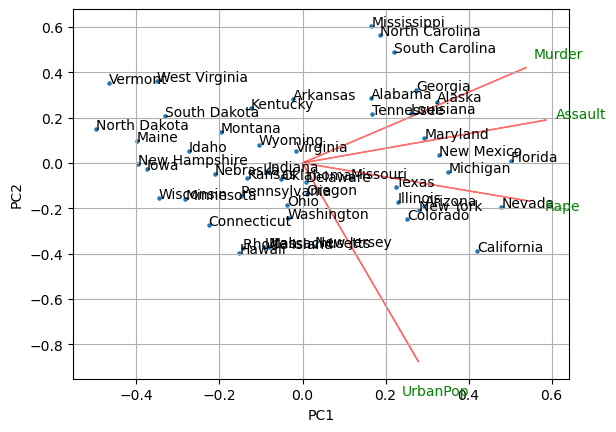

In [94]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

In [95]:
pc1 = abs(std_pca.components_[0])  # Components x features - access at index 0 to get the first component
pc2 = abs(std_pca.components_[1])

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


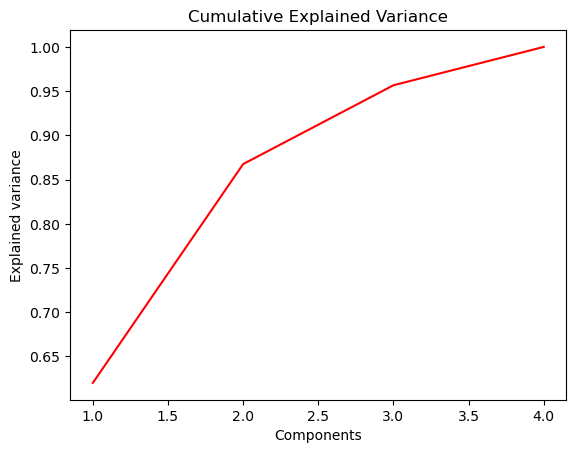

In [96]:
# Cumulative variance plot

plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1, len(std_pca.explained_variance_ratio_) + 1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")
plt.show()

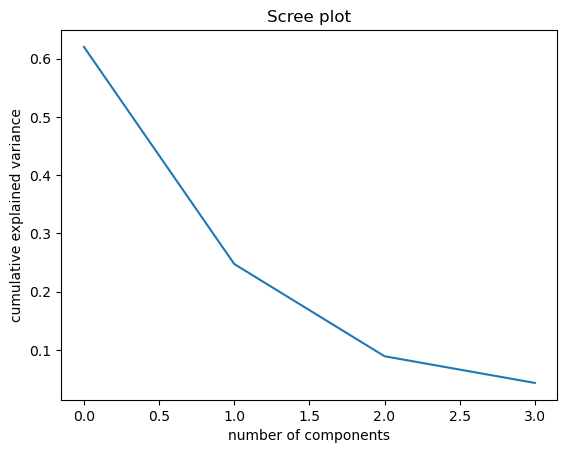

In [97]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

In [99]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = data.index)
pca_df.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


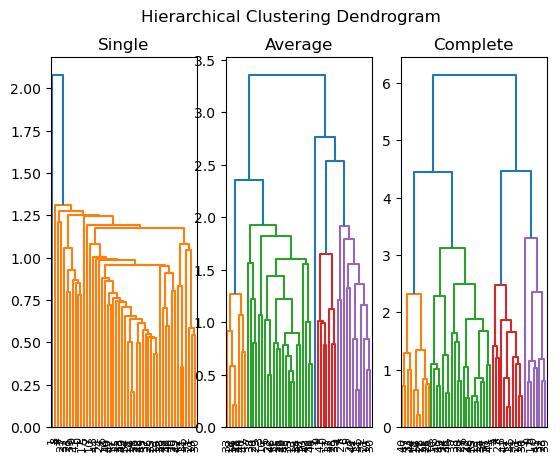

In [100]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

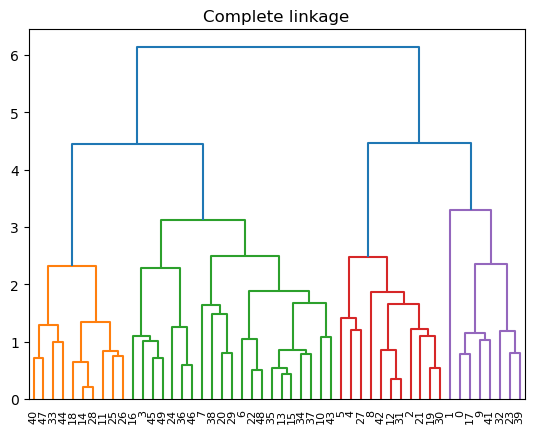

In [101]:
plt.title("Complete linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


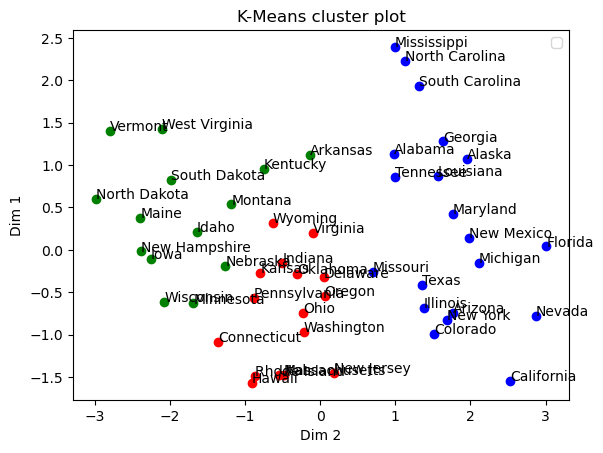

In [103]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

In [104]:
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]

group0 = np.array(cities)[group0_indices]
group1 = np.array(cities)[group1_indices]
group2 = np.array(cities)[group2_indices]

print("Group 0: {}\n\n".format(group0))
print("Group 1: {}\n\n".format(group1))
print("Group 2: {}\n\n".format(group2))

Group 0: ['Connecticut' 'Delaware' 'Hawaii' 'Indiana' 'Kansas' 'Massachusetts'
 'New Jersey' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'Utah' 'Virginia' 'Washington' 'Wyoming']


Group 1: ['Alabama' 'Alaska' 'Arizona' 'California' 'Colorado' 'Florida' 'Georgia'
 'Illinois' 'Louisiana' 'Maryland' 'Michigan' 'Mississippi' 'Missouri'
 'Nevada' 'New Mexico' 'New York' 'North Carolina' 'South Carolina'
 'Tennessee' 'Texas']


Group 2: ['Arkansas' 'Idaho' 'Iowa' 'Kentucky' 'Maine' 'Minnesota' 'Montana'
 'Nebraska' 'New Hampshire' 'North Dakota' 'South Dakota' 'Vermont'
 'West Virginia' 'Wisconsin']


